# 한국 Coronavirus 분석

# 1. 데이터 설명 및 보기

## Data Science for COVID-19 (DS4C)
- 이 데이터는 한국의 코로나 관련 데이터로서 코로나를 막기 위해 사용되는 Competition 데이터이다.
- 이 데이터는 1월부터 5월 30일까지의 코로나 관련 데이터이다.
- 출처: https://www.kaggle.com/kimjihoo/coronavirusdataset
- 연구기관
    - Maggie Munkhjargal (Harvard T.H. Chan School of Public Health)
    - Gwang-Jin Kim (University of Freiburg)
    - Sofia K. Mettler (Swiss Federal Institute of Technology, University of Zurich)
    - Myung-Bae Park (Department of Gerontology Health and Welfare, Pai Chai University)
    - Jinhee Lee (Department of Psychiatry, Yonsei University Wonju College of Medicine)
    - Sun Kim (Harvard T.H. Chan School of Public Health)
    - Ardiansyah Ardiansyah (Chonnam National University)
    - Atina Husnayain (College of Medical Science and Technology, Taipei Medical University)
    - Carlos Saez (Universitat Politècnica de València & Harvard Medical School)
    - Dimitrios E. Kouzoukas (Edward Hines, Jr. VA Hospital & Loyola University Chicago)
    - Tanima Bose (Ludwig-Maximilian University of Munich)
    - Keumseok Peter Koh (Faculty of Social Sciences, The University of Hong Kong)
    ![](https://user-images.githubusercontent.com/50820635/83261173-e8062e00-a1f5-11ea-9968-1259e1b704d1.PNG)



- 후원
    - Google Korea (Soonson Kwon)
    - Slack Technologies (Andy Pflaum)
    - Notion Labs
    ![](https://user-images.githubusercontent.com/50820635/77623631-c4b7cc00-6f83-11ea-85d8-fc0c25d28af2.PNG)

### The Lists of CSV Data Table 
https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description 참조



### 사용한 csv
- #### Patient Data¶
    - PatientInfo: 대한민국 COVID-19 환자의 역학 데이터

- #### Time Series Data
    - Time: 대한민국 COVID-19 현황 시계열 데이터
    - TimeProvince: 대한민국 지방 단위 COVID-19 현황 시계열 데이터

- #### Additional Data
    - Weather: 한국 지역 날씨 데이터

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### 파이썬 경고 메세지 안보이게 하기

In [146]:
import warnings

In [147]:
warnings.filterwarnings(action='ignore')

## 한글 폰트 사용 
- rc: 폰트 지정
- rc: minus 부호 오류를 방지하기 위해 사용

In [148]:
plt.rc('font',family="AppleGothic")# 맥
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기 

In [216]:
data = pd.read_csv("./coronavirusdataset/PatientInfo.csv")

### 데이터 백업하기

In [ ]:
patient = data.copy()

file_path = './coronavirusdataset/PatientInfo_backup.csv'

data.to_csv(file_path)

# 1. 데이터 보기

### 데이터 정보
- patient_id, global_num infection_case는 수치형이고 나머지는 범주형이다.

In [150]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
patient_id            4004 non-null int64
global_num            2806 non-null float64
sex                   3674 non-null object
birth_year            3267 non-null object
age                   3525 non-null object
country               4004 non-null object
province              4004 non-null object
city                  3926 non-null object
disease               18 non-null object
infection_case        3211 non-null object
infection_order       31 non-null float64
infected_by           899 non-null object
contact_number        680 non-null object
symptom_onset_date    535 non-null object
confirmed_date        4001 non-null object
released_date         1508 non-null object
deceased_date         65 non-null object
state                 4004 non-null object
dtypes: float64(2), int64(1), object(15)
memory usage: 563.1+ KB


###  데이터 보기

In [151]:
patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


## 데이터 설명 
- 이 데이터는 1월부터 지금까지 코로나 감염자에 대한 정보 데이터이다.
- ### column 설명
    - patient_id: 환자의 ID
    - sex: 환자의 성
    - age: 환자의 나이
    - country: 환자의 국적
    - province: 환자가 사는 지역
    - city: 환자가 사는 도시
    - infection_case: 감염사례
    - infected_by: 환자를 감염시킨 사람의 ID
    - contact_number: 사람과의 접촉 수
    - symptom_onset_date: 증상 시작 날짜
    - confirmed_date : 코로나 감염 확정일자
    - released_date: 격리해제된 날짜
    - deceased_date: 사망 날짜
    - state: 격리/격리해제/사망

### 결측치 확인

In [152]:
patient.isnull().sum()

patient_id               0
global_num            1198
sex                    330
birth_year             737
age                    479
country                  0
province                 0
city                    78
disease               3986
infection_case         793
infection_order       3973
infected_by           3105
contact_number        3324
symptom_onset_date    3469
confirmed_date           3
released_date         2496
deceased_date         3939
state                    0
dtype: int64

# 3. 데이터 클린징
- 데이터를 클리닝 분석하는 도중 약간을 에러가 발생했는데 이유가 nan이 아닌 이상한 값들이 들어 있었다. 
- 따라서 이 값들은 직접 찾아 처리해주었다.

In [153]:
patient[patient['birth_year']==" "]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2362,3009000020,NaN,male,,20s,Korea,Gangwon-do,Wonju-si,NaN,Itaewon Clubs,NaN,NaN,11,NaN,2020-05-13,NaN,NaN,isolated


In [154]:
patient["birth_year"][2362] = str(2020 - 20+1)

In [155]:
patient[patient["birth_year"]=="11997"]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1300,1400000201,11412.0,female,11997,NaN,Korea,Incheon,Gyeyang-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-05-29,NaN,NaN,isolated


11997에 태어난 사람이 지금 있을 수 없으므로 잘못된 데이터이다. 현재 해당 데이터에는 맞지 않은 요소로 없애준다.

In [156]:
patient["birth_year"]= patient["birth_year"].drop(1300)

### 생일이 없는 사람은 일단 숫자 0으로 바꾸어준다.

In [157]:
patient["birth_year"] = patient["birth_year"].fillna("0")

### 데이터 변수 바꾸어주기
- 지금 이 데이터의 age는 범주형으로 되있어 다양성이 부족하다. 따라서 birth_year값을 이용해서 age의 값을 연속형으로 바꾸어 주겠다. 그러기 위해서는 birth_year도 연속형으로 바꾸어주어야 하며, 그다음에 age의 값을 바꾸어주어야 된다.

In [158]:
print("birth_year의 유니크한 값들:\n",patient['birth_year'].unique())

birth_year의 유니크한 값들:
 ['1964' '1987' '1991' '1992' '1966' '1995' '1983' '1960' '1962' '1938'
 '1952' '1943' '1945' '1944' '2000' '1941' '1936' '1985' '1961' '1980'
 '1958' '1986' '1968' '1950' '1954' '1965' '1970' '1984' '1963' '1976'
 '1953' '1977' '1979' '1999' '1993' '1956' '1994' '1973' '1937' '1946'
 '1990' '1935' '1955' '1974' '1975' '1967' '1982' '2003' '1996' '1988'
 '1951' '1997' '2005' '1969' '1972' '1971' '1929' '2013' '1981' '2020'
 '1989' '1978' '1998' '1959' '1949' '2007' '2004' '2001' '2012' '1939'
 '2006' '1934' '2008' '2009' '2016' '2002' '2010' '1948' '2019' '2014'
 '1932' '0' '1947' '2015' '2011' '1957' '1930' '1933' '1927' '2018' '1942'
 '1940' '1926' '1922' '1928' '1925' '2017' '1916' '1931' '1923']


In [159]:
patient["birth_year"] = patient["birth_year"].astype(int)
patient['age'] = 2020 - patient['birth_year'] + 1

age와 birth_year 부분이 연속형으로 바뀐것이 보일 것이다. 

In [160]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
patient_id            4004 non-null int64
global_num            2806 non-null float64
sex                   3674 non-null object
birth_year            4004 non-null int64
age                   4004 non-null int64
country               4004 non-null object
province              4004 non-null object
city                  3926 non-null object
disease               18 non-null object
infection_case        3211 non-null object
infection_order       31 non-null float64
infected_by           899 non-null object
contact_number        680 non-null object
symptom_onset_date    535 non-null object
confirmed_date        4001 non-null object
released_date         1508 non-null object
deceased_date         65 non-null object
state                 4004 non-null object
dtypes: float64(2), int64(3), object(13)
memory usage: 563.1+ KB


#### 하지만 문제점은 생년을 모르는 사람은 birth가 0이므로 나이가 2021로 나올 것이다.

In [161]:
print("유니크한 값들:\n",patient['age'].unique())

유니크한 값들:
 [  57   34   30   29   55   26   38   61   59   83   69   78   76   77
   21   80   85   36   60   41   63   35   53   71   67   56   51   37
   58   45   68   44   42   22   28   65   27   48   84   75   31   86
   66   47   46   54   39   18   25   33   70   24   16   52   49   50
   92    8   40    1   32   43   23   62   72   14   17   20    9   82
   15   87   13   12    5   19   11   73    2    7   89 2021   74    6
   10   64   91   88   94    3   79   81   95   99   93   96    4  105
   90   98]


#### 따라서 2021이 아닌 데이터만 사용하겠다.

In [162]:
patient.shape

(4004, 18)

In [163]:
patient[patient['age']!=2021].shape

(3266, 18)

In [164]:
patient = patient[patient['age']!=2021]

# 5. 머신러닝

## 이 데이터를 가지고 나는 예측 모델 만들기
나는 이 데이터를 통해 사망자를 예측하는 모델을 만들고 싶다. 따라서 간단한 나이 예측 딥러닝 모델을 만들려고 한다.

## 필요없는 열 삭제하기
- 나이를 예측하기 위해서 필요있는 column만 사용해야 된다. 

In [21]:
patient = patient.drop(["patient_id"],axis=1)
patient = patient.drop(["global_num"],axis=1)
patient = patient.drop(["birth_year"],axis=1)
patient = patient.drop(["country"],axis=1)
patient = patient.drop(["province"],axis=1)
patient = patient.drop(["city"],axis=1)
patient = patient.drop(["infection_order"],axis=1)
patient = patient.drop(["infected_by"],axis=1)
patient = patient.drop(["contact_number"],axis=1)
patient = patient.drop(["symptom_onset_date"],axis=1)
patient = patient.drop(["confirmed_date"],axis=1)
patient = patient.drop(["state"],axis=1)

In [22]:
patient.isnull().sum()

sex                  0
age                  0
disease           3249
infection_case     708
released_date     2041
deceased_date     3207
dtype: int64

### 열의 이름 바꾸어 주기 
- deceased_date를 deceased로 그리고 released_date를 released로 바꾸어 주겠다.

In [23]:
patient = patient.rename(columns={'deceased_date':'deceased','released_date':'released'})

deceased_date를 deceased로 그리고 released_date를 released로 바뀌었다.

In [24]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3266 entries, 0 to 3996
Data columns (total 6 columns):
sex               3266 non-null object
age               3266 non-null int64
disease           17 non-null object
infection_case    2558 non-null object
released          1225 non-null object
deceased          59 non-null object
dtypes: int64(1), object(5)
memory usage: 178.6+ KB


In [25]:
patient['deceased']=patient['deceased'].fillna(0)

In [26]:
patient = patient.set_value(patient['deceased'] != 0,'deceased',1)

In [27]:
patient['released']=patient['released'].fillna(0)

In [28]:
patient = patient.set_value(patient['released'] != 0,'released',1)

In [29]:
patient['disease']=patient['disease'].fillna(0)

In [30]:
patient[(patient['disease']!=0)]['disease'] = 1

In [31]:
patient = patient[patient['sex'].notnull()]

In [32]:
patient['infection_case']=patient['infection_case'].fillna('etc')

### 결측치 확인

In [33]:
patient.isnull().sum()

sex               0
age               0
disease           0
infection_case    0
released          0
deceased          0
dtype: int64

### 딥러닝 학습을 위해서 disease의 타입을 수치형으로 바꾸어준다.

In [34]:
patient['disease'] = patient['disease'].astype('int')

In [35]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3266 entries, 0 to 3996
Data columns (total 6 columns):
sex               3266 non-null object
age               3266 non-null int64
disease           3266 non-null int64
infection_case    3266 non-null object
released          3266 non-null int64
deceased          3266 non-null int64
dtypes: int64(4), object(2)
memory usage: 178.6+ KB


최종적으로 사용할 변수들을 보자면, age, disease, released_date, deceased_date는 수치형이지만, age만 연속형이만 나머지는 0 또는 1의 값을 가지므로 범주형에 속한다. 그 나머지를 범주형으로 바꾸지 않은 이유는 학습을 위해서는 범주형 값이 아닌 수치형으로 해야되기 때문이다. 나머지 sex, infection_cases 범주형에 속한다.

### custom_data는  임의로 만들어진 데이터로 마지막에 모델에 넣어서 사망가능성을 예측해 보겠다.

In [36]:
custom_data = pd.DataFrame({'sex':['female'],'age':[32],'disease':[1],
                            'infection_case':['Dongan Church'],
                            'released':[1],'deceased':[0] },index=[3997])

In [37]:
custom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 3997 to 3997
Data columns (total 6 columns):
sex               1 non-null object
age               1 non-null int64
disease           1 non-null int64
infection_case    1 non-null object
released          1 non-null int64
deceased          1 non-null int64
dtypes: int64(4), object(2)
memory usage: 56.0+ bytes


In [38]:
patient = pd.concat([patient,custom_data])

In [39]:
patient.isnull().sum()

sex               0
age               0
disease           0
infection_case    0
released          0
deceased          0
dtype: int64

### 열의 위치 바꾸기
- 머신러닝을 돌리기 위해 patient 데이터 전체를 one_hot으로 바꾸어주어야 된다. 하지만 이 데이터를 one_hot으로 하면 열의 길이가 너무 커져서 deaceased와 나머지를 분류하기 어려워진다. 따라서 deceased를 맨앞에 놓고 deceased의 위치에 sex를 놓겠다. 

In [40]:
patient.head()

,sex,age,disease,infection_case,released,deceased
0,male,57,0,overseas inflow,1,0
1,male,34,0,overseas inflow,1,0
2,male,57,0,contact with patient,1,0
3,male,30,0,overseas inflow,1,0
4,female,29,0,contact with patient,1,0


In [41]:
temp = patient['sex'].copy()
patient['sex'] = patient['deceased']
patient['deceased'] = temp
patient = patient.rename(columns={'sex':'deceased','deceased':'sex'})

In [42]:
patient.head()

,deceased,age,disease,infection_case,released,sex
0,0,57,0,overseas inflow,1,male
1,0,34,0,overseas inflow,1,male
2,0,57,0,contact with patient,1,male
3,0,30,0,overseas inflow,1,male
4,0,29,0,contact with patient,1,female


## patient의 범주형 데이터 one_hot으로 바꾸어 주기
- 학습을 하기 위해서는 범주형 데이터를 수치형으로 바꾸어주어야 한다. 이때 사용되는 개념이 one_hot 인코딩이다. 
- one_hot인코딩은 나에 해당되는 인덱스의 위치 값을 1로 하고 나머지는 0으로 만드는 것이다.
    - ex)숫자 3(0~9)-> [0,0,0,1,0,0,0,0,0,0]

In [43]:
patient = pd.get_dummies(patient)

In [44]:
patient.head()

,deceased,age,disease,released,infection_case_Bonghwa Pureun Nursing Home,infection_case_Changnyeong Coin Karaoke,infection_case_Cheongdo Daenam Hospital,infection_case_Coupang Logistics Center,infection_case_Dongan Church,infection_case_Eunpyeong St. Mary's Hospital,...,infection_case_River of Grace Community Church,infection_case_Seongdong-gu APT,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_overseas inflow,sex_female,sex_male
0,0,57,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,34,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,57,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,29,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


sex는 sex_male만으로 남, 여를 구분할 수 있어 sex_female을 없애겠다.

In [45]:
del patient['sex_female']

In [46]:
patient.head()

,deceased,age,disease,released,infection_case_Bonghwa Pureun Nursing Home,infection_case_Changnyeong Coin Karaoke,infection_case_Cheongdo Daenam Hospital,infection_case_Coupang Logistics Center,infection_case_Dongan Church,infection_case_Eunpyeong St. Mary's Hospital,...,infection_case_Pilgrimage to Israel,infection_case_River of Grace Community Church,infection_case_Seongdong-gu APT,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_overseas inflow,sex_male
0,0,57,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,34,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,57,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,29,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Train/Test/Custom로 데이터 나누기
- 데이터의 샘플 개수가 3267이 이므로 
- train은 2999개
- test는 267개
- custom은 1개

In [48]:
train_patient = patient.iloc[:2999,:]

In [49]:
test_patient = patient.iloc[2999:-1,:]

In [50]:
custom_patient = patient.iloc[-1,:]

### 검증

In [51]:
print("patient 사이즈: ",patient.shape)

patient 사이즈:  (3267, 29)


In [52]:
print("train_patient 사이즈: ",train_patient.shape)
print("test_patient 사이즈: ",test_patient.shape)
print("custom_data 사이즈: ",custom_patient.shape)

train_patient 사이즈:  (2999, 29)
test_patient 사이즈:  (267, 29)
custom_data 사이즈:  (29,)


## 학습/테스트 데이터 만들기

#### train 데이터

In [53]:
train_target = train_patient.iloc[:,0:1]
train_target = train_target.to_numpy()

train_data = train_patient.iloc[:,1:]
train_data = train_data.to_numpy()

In [54]:
print("train_data 크기:",np.shape(train_data))
print("trian_target 크기:", np.shape(train_target))

train_data 크기: (2999, 28)
trian_target 크기: (2999, 1)


#### test 데이터

In [55]:
test_target = test_patient.iloc[:,0:1]
test_target = test_target.to_numpy()

test_data = test_patient.iloc[:,1:]
test_data = test_data.to_numpy()

In [56]:
print("test_data 크기:",np.shape(test_data))
print("test_target 크기:", np.shape(test_target))

test_data 크기: (267, 28)
test_target 크기: (267, 1)


#### custom 데이터

In [57]:
custom_target = custom_patient[0]

custom_data = custom_patient[1:]
custom_data = custom_data.to_numpy()

In [58]:
print("custom_data 크기:",np.shape(custom_data))
print("custom_target 크기:", np.shape(custom_target))

custom_data 크기: (28,)
custom_target 크기: ()


## 딥러닝 모델 만들기
- 모델은 단순하게 만들기위해 Fully_connected(Dense) Network만 만들겠다. 
- 여기서 사용된 keras는 수업에 쓰인 책을 기반으로 만들어졌습니다.

In [59]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow as tf

In [70]:
train_size = train_data.shape[1]
batch_size = 128
learning_rate = 0.00001

In [71]:
model = models.Sequential()

In [72]:
model.add(layers.Dense(144,activation='relu',input_shape=(train_size,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(12,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 144)               4176      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                9280      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                780       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 14,249
Trainable params: 14,249
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy']
)

In [75]:
history = model.fit(train_data,train_target,epochs=20,batch_size=batch_size,validation_split=0.2,verbose=0)

In [76]:
history_dict = history.history

history_dict.keys()

loss_values = history_dict['loss']

accuracy = history_dict['accuracy']

val_loss = history_dict['val_loss']

val_accuracy = history_dict['val_accuracy']

epochs = np.arange(1,len(val_loss)+1)

## 머신러닝 학습 시각화

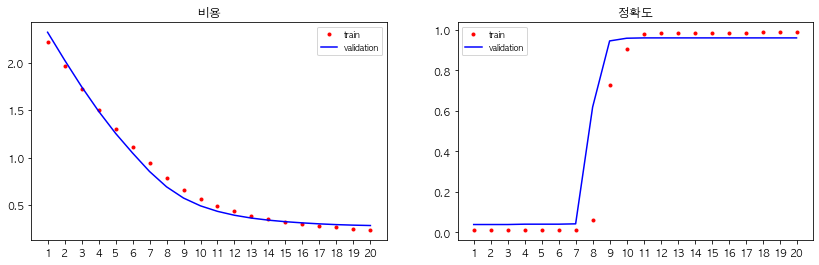

In [106]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("비용")
plt.plot(epochs,loss_values,".r", label='train',)
plt.plot(epochs,val_loss,"-b", label='validation')
plt.legend(fontsize='small')
plt.xticks(epochs)

plt.subplot(1,2,2)
plt.title("정확도")
plt.plot(epochs,accuracy,".r", label='train')
plt.plot(epochs,val_accuracy,"-b", label='validation')
plt.legend(fontsize='small')
plt.xticks(epochs)
plt.show()

In [78]:
result = model.evaluate(test_data,test_target)

267/267 [==============================] - 0s 31us/sample - loss: 0.2607 - accuracy: 0.9700


In [79]:
print("test에 대한 정확도:",result[1])

test에 대한 정확도: 0.97003746


> ## 결과 분석
train_accuracy는 98% 이고 valid_accuracy: 96% 이다. validation의 정확도가 높아서 test_accuracy가 97% 나왔다. 전반적으로 정확도가 96%이상 이므로 이 모델은 예측하는 데 쓰여도 다소 문제가 없을 것이다.

### custom_patient 예측하기

In [80]:
predict_deceased = {0:"생존", 1:"사망"}

In [81]:
print("custom_data\n",custom_data)

custom_data
 [32  1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [82]:
print("머신의 예측:",predict_deceased[round(float(model(np.expand_dims(custom_data,axis=0)).numpy()))])
print("정답:",predict_deceased[custom_target])

머신의 예측: 생존
정답: 생존


# 5. 통계

### T 분석 하기
- T분석은 두 집단의 평균을 비교하는 통계적 검정 방벙으로 단순히 차이의 존여 여부를 떠나 두 집단의 비교가 통계적으로 의미가 있는가를 감정하는 방법이다.
- 나는 두 집단의 감염자 누적치와 사망자 누적치에 대해서 T분석을 하겠다.
- 여기서 사용할 데이터는 시간에 따른 감염자 수이므로 time.csv을 사용하겠다.

### 데이터 불러오기

In [220]:
data = pd.read_csv("./coronavirusdataset/Time.csv")

### 데이터 백업하기

In [221]:
time = data.copy()

file_path = './coronavirusdataset/Time_backup.csv'

data.to_csv(file_path)

In [167]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


### column 설명
- date: 날짜
- time: 시간
- test: 누적 검사 횟수
- negative: 누적된 음성자 수
- released: 누정된 양성자 수
- deceased: 누적된 사망자 수

In [210]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
date         133 non-null object
time         133 non-null int64
test         133 non-null int64
negative     133 non-null int64
confirmed    133 non-null int64
released     133 non-null int64
deceased     133 non-null int64
dtypes: int64(6), object(1)
memory usage: 7.4+ KB


#### 결측치 확인

In [169]:
time.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

### 감염자 누적치와 사망자 누적치간의 평균 차이가 있는가?
- 귀무가설: 감염자 누적치와 사망자 누적치간의 평균 차이가 없다.
- 대립가설: 감염자 누적치와 사망자 누적치간의 평균 차이가 있다.

In [176]:
a = time['deceased']
b = time['released']

In [177]:
from scipy import stats

In [178]:
tTestResult = stats.ttest_ind(a,b)

In [179]:
tTestResultDiffVar = stats.ttest_ind(a,b,equal_var=False)

In [181]:
print(tTestResult)

Ttest_indResult(statistic=-11.75553495600972, pvalue=6.11021010854236e-26)


> ## 결론
검정 결과 p-value값이 0.05미만이므로 두 집단 코로나 사망자 누적치와 코로나 감염 누적치는 의미 있는 차이가 존재한다.

# 5. 상관분석 하기
- 상관분석은 두 연속혀 변수 사이 상관 관계가 존재하는지를 파악하고 상관관계의 저옫를 확인하는 것이다.


### 감염자 누적치와 사망자 누적치간의 상관 분석을 하겠다.


In [171]:
date_num = []
for i in range(len(time["date"])):
    string =" ".join(time["date"][i].split('-')[1:])
    if(i%6==0):
        date_num.append(string)

# 4. 데이터 시각화

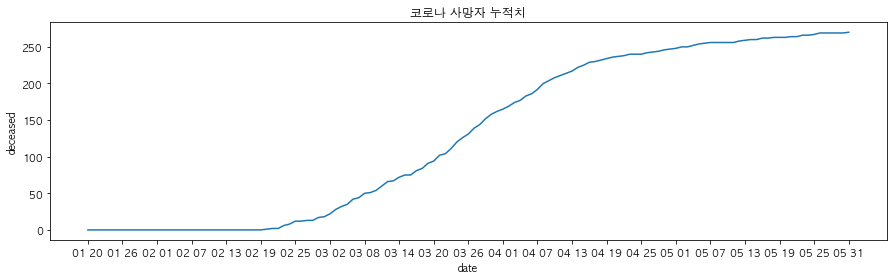

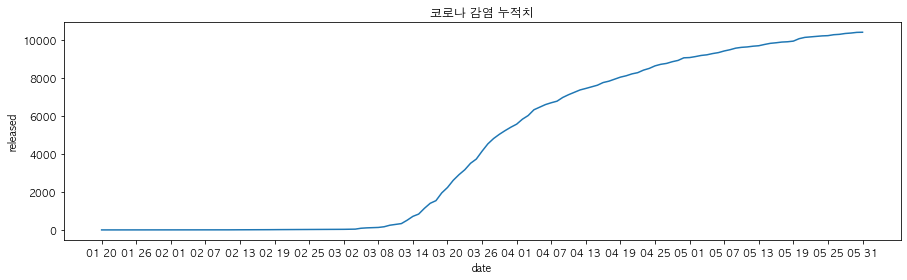

In [186]:
plt.figure(figsize=(15,4))
sns.lineplot(x="date",y="deceased",data=time)
plt.xticks(np.arange(0,len(time['date']),6),date_num)
plt.title("코로나 사망자 누적치")
plt.show()

plt.figure(figsize=(15,4))
sns.lineplot(x="date",y="released",data=time)
plt.xticks(np.arange(0,len(time['date']),6),date_num)
plt.title("코로나 감염 누적치")
plt.show()

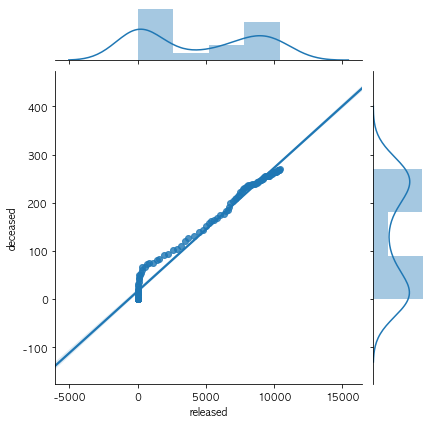

In [200]:
sns.jointplot(x="released", y="deceased",data=time,kind="reg")

In [201]:
corr = time.corr()

In [202]:
corr

,time,test,negative,confirmed,released,deceased
time,1.000000,-0.804594,-0.793523,-0.953344,-0.715019,-0.796475
test,-0.804594,1.000000,0.999531,0.922994,0.972763,0.982785
negative,-0.793523,0.999531,1.000000,0.915619,0.976891,0.984235
confirmed,-0.953344,0.922994,0.915619,1.000000,0.866692,0.924320
released,-0.715019,0.972763,0.976891,0.866692,1.000000,0.990298
deceased,-0.796475,0.982785,0.984235,0.924320,0.990298,1.000000


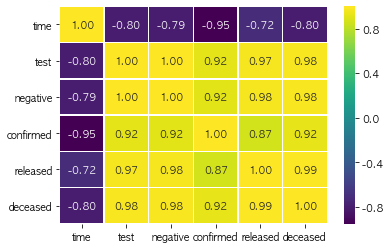

In [209]:
sns.heatmap(data=corr,annot=True,fmt='.2f',linewidths=0.5,cmap="viridis")

> ## 그래프 분석
첫번째 두 라인 그래프를 보면 코로나 감염 누적치의 증가률이 사망자 증가률가 비슷한것을 알수 있다. 두번쨰 joinplot를 보면 released의 값이 커질수록 deceased의 값이 커지는 것을 알수 있고 분포도 동일하다는 것을 알수 있다. 하지막으로 hitmap 그래프를 봤을 시 released와 deceased의 상관계수가 99%이기에 사망자 누적치와 코로나 감염 누적치의 강관관계가 존재한다는 것을 알 수 있다.

# 6. 차별화 포인트

## 온도및 습도에 따른 코로나 감염자 수 분석하기
뉴스, 블로그 그리고 논문등에서 보면 코로나는 온도및 습도에 따라 감염자 수가 들어난다고 한다. 코로나는 온도가 5도에서 10도에서 잘 번식을 잘 하고 습도가 47~79%에서 잘 번식한다고 한다. 이 주장이 우리나라에도 적용이 되는지 궁금하여 온도및 습도에 따른 코로나 감염자 수를 분석하겠다.  
- 참조: https://blog.naver.com/pp3907/221857385604

### 데이터 불러오기

In [223]:
data1 = pd.read_csv("./coronavirusdataset/Weather.csv")

data2 = pd.read_csv("./coronavirusdataset/TimeProvince.csv")

### 데이터 백업하기

In [224]:
weather = data1.copy()
file_path = './coronavirusdataset/Weather_backup.csv'

data1.to_csv(file_path)

time_province = data2.copy()
file_path = './coronavirusdataset/TimeProvince_backup.csv'

data2.to_csv(file_path)

### column 분석
- date: 날짜
- time: 시간
- province: 감염자 사는 곳
- negative: 누적된 음성자 수
- released: 누정된 양성자 수
- deceased: 누적된 사망자 수

In [118]:
time_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 6 columns):
date         2261 non-null object
time         2261 non-null int64
province     2261 non-null object
confirmed    2261 non-null int64
released     2261 non-null int64
deceased     2261 non-null int64
dtypes: int64(4), object(2)
memory usage: 106.1+ KB


- code: 지역의 코드
- province: 감염자 사는 곳
- date: 날짜
- avg_temp: 평균 온도
- min_temp: 최저 온도
- max_temp: 최고 온도
- precipitation: 일 강수량
- max_wind_speed: 최대 풍속
- most_wind_direction: 가장 빈번한 풍향
- avg_relative_humidity: 평균 상대습도

In [212]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25807 entries, 0 to 25806
Data columns (total 10 columns):
code                     25807 non-null int64
province                 25807 non-null object
date                     25807 non-null object
avg_temp                 25792 non-null float64
min_temp                 25802 non-null float64
max_temp                 25804 non-null float64
precipitation            25807 non-null float64
max_wind_speed           25798 non-null float64
most_wind_direction      25778 non-null float64
avg_relative_humidity    25787 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ MB


###  결측치 확인

In [214]:
time_province.isnull().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

In [213]:
weather.isnull().sum()

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

#### 위의 결측치가 있는만 두 데이터를 병합한 다음에 결측치를 처리하겠다.

### 데이터 병합하기
- weather에는 시간에 따른 날씨에 대한 정보가 time_province 시간에 따른 코로나 정보가 들어 있다. 
- 따라서 date와, 지방을 기준으로 두 데이터를 병합 해주겠다.

In [120]:
time_weather = pd.merge(left=weather,right=time_province,on=["date","province"],how="inner")

In [121]:
time_weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,time,confirmed,released,deceased
0,10000,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,270.0,46.8,16,0,0,0
1,11000,Busan,2020-01-20,5.1,1.6,9.8,0.0,6.1,270.0,45.6,16,0,0,0
2,12000,Daegu,2020-01-20,4.6,2.4,8.1,0.0,6.4,290.0,44.1,16,0,0,0
3,13000,Gwangju,2020-01-20,4.0,1.2,7.9,0.0,3.3,270.0,63.1,16,0,0,0
4,14000,Incheon,2020-01-20,1.2,-2.1,5.1,0.0,8.6,320.0,56.0,16,1,0,0


In [122]:
time_weather.isnull().sum()

code                     0
province                 0
date                     0
avg_temp                 0
min_temp                 0
max_temp                 0
precipitation            0
max_wind_speed           0
most_wind_direction      1
avg_relative_humidity    0
time                     0
confirmed                0
released                 0
deceased                 0
dtype: int64

### 결측치 제거

most_wind_direction은 사용하지 않을 변수 이므로 없애준다.

In [123]:
del time_weather['most_wind_direction']

In [124]:
time_weather.isnull().sum()

code                     0
province                 0
date                     0
avg_temp                 0
min_temp                 0
max_temp                 0
precipitation            0
max_wind_speed           0
avg_relative_humidity    0
time                     0
confirmed                0
released                 0
deceased                 0
dtype: int64

- 대구가 다른 지역보다 감염 비율이 높으므로, 각 지역에 따른 감염자수와 대구와 대구이 아닌 모든 지역에 따른 감염자수를 따로 구하겠다.
- 현재 데이터는 감염자가 누적된 값만 가지고 있어 하루 감염자 수에 대한 값은 가지고 있지 않다. 따라서 다음날에서 현재날을 뺴주어 하루 감염자 수를 구하고 그 데이터를 time_weather에 추가 해주겠다.

### 현재 데이터는 각 지방에 따른 감염자 누적치가 들어있다. 하지만 섭씨온도또는 상대습도에 따른 감염자수를 분석하기 위해서는 누적치가 아닌 매일 몇명이 걸리는 지를 알아야 한다. 따라서 각 지역에 따라 해당 일 누적치에 그 전 누적치를 빼주어 매일 감염자 수를 구해  각 해당 지역의 DataFrame에 time_weather_confiremd_gradient라는 column를 새로 추가하여 그 DataFrame를 time_weather_dict 딕셔너리에 각각 넣어 주겠다.

In [126]:
time_weather_dict = {}
province_name = np.unique(time_weather["province"])
time_weather_gradient = []
for i in range(len(province_name)):
    sub_time_weather = time_weather[time_weather["province"]==province_name[i]]
    sub_time_weather_confiremd_gradient_list = []
    for j in range(len(sub_time_weather['confirmed'])-1):
        sub_time_weather_confiremd_gradient_list.append(
            sub_time_weather['confirmed'].iloc[j+1]-sub_time_weather['confirmed'].iloc[j])
    sub_time_weather_confiremd_gradient_list.insert(0,0) # 맨 처음 날짜 감염자 수는 0으로 하겠다.
    sub_time_weather["time_weather_confiremd_gradient"] = sub_time_weather_confiremd_gradient_list
    time_weather_gradient.append(sub_time_weather["time_weather_confiremd_gradient"])
    time_weather_dict[province_name[i]]=sub_time_weather

# 4. 데이터 시각화

### 각 지역 평균 온도에 따른 각 지역의 감염자 수
- 섭씨온도는 연속형인데 그래프를 보기 쉽게 만들기 위해서 섭씨온도를 범주형을 만들어 주어 섭씨온도 대비 감염자수를 그래프로 그리겠다.

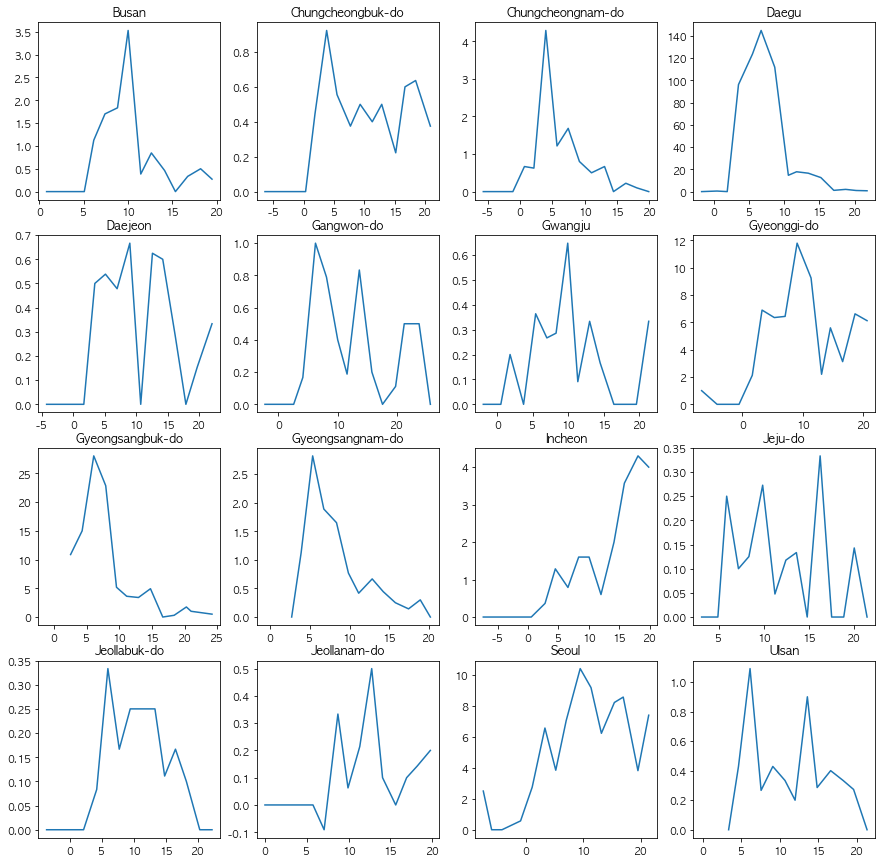

In [131]:
fig = plt.figure(figsize=[10,6])
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(0,len(province_name)):
    a = fig.add_subplot(4, 4, i+1)
    g = pd.cut(time_weather_dict[province_name[i]]["avg_temp"],15)
    df = time_weather_dict[province_name[i]].groupby(g)
    df = df.mean()
    plt.plot(df['avg_temp'].values,df['time_weather_confiremd_gradient'].values)
    plt.title(province_name[i])

### 각 지역 상대습도에 따른 각 지역의 감염자 수
- 섭씨온도와 마찬가지로 상대습도도 연속형이라 그래프를 보기 쉽게 만들기 위해서 상대습도를 범주형을 만들어 주어 상대습도 대비 감염자수를 그래프로 그리겠다.

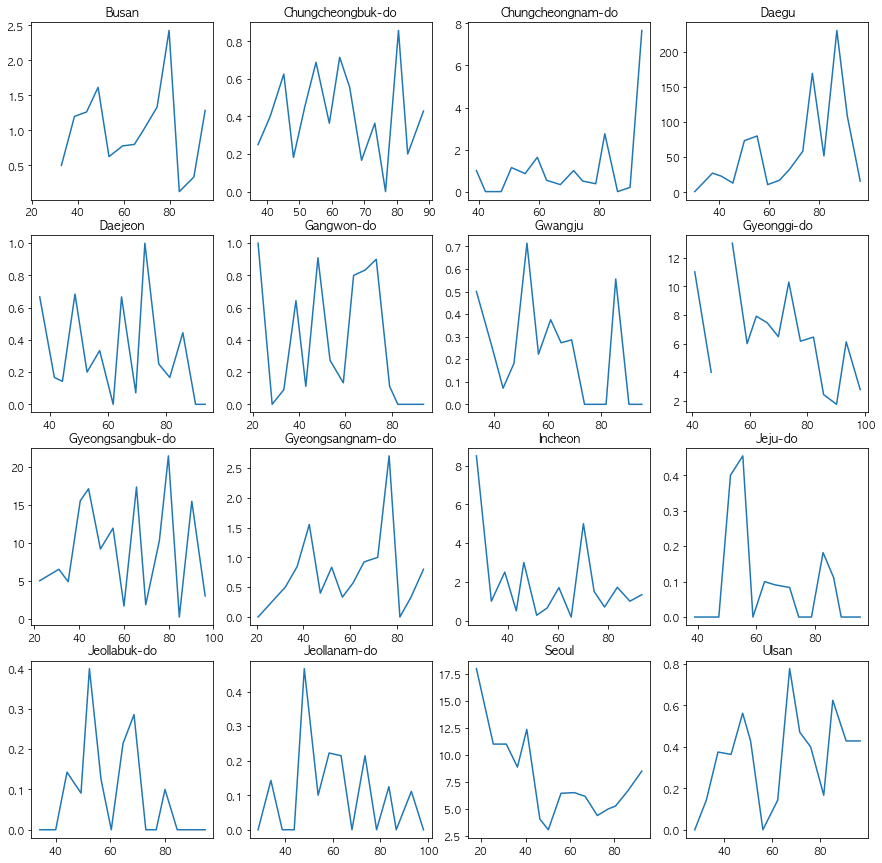

In [128]:
fig = plt.figure(figsize=[10,6])
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(0,len(province_name)):
    a = fig.add_subplot(4, 4, i+1)
    g = pd.cut(time_weather_dict[province_name[i]]["avg_relative_humidity"],15)
    df = time_weather_dict[province_name[i]].groupby(g)
    df = df.mean()
    plt.plot(df['avg_relative_humidity'].values,df['time_weather_confiremd_gradient'].values)
    plt.title(province_name[i])

### 온도및 습도에 따라 각 지역을 분석하여 위의 주제를 알아내는 것은 다소 어려운 것 같다. 따라서 각 지역을 평균으로 하나로 묶어 분석하겠다.

In [132]:
time_weather['time_weather_confiremd_gradient'] = (pd.concat(time_weather_gradient))
time_weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,avg_relative_humidity,time,confirmed,released,deceased,time_weather_confiremd_gradient
0,10000,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,46.8,16,0,0,0,0
1,11000,Busan,2020-01-20,5.1,1.6,9.8,0.0,6.1,45.6,16,0,0,0,0
2,12000,Daegu,2020-01-20,4.6,2.4,8.1,0.0,6.4,44.1,16,0,0,0,0
3,13000,Gwangju,2020-01-20,4.0,1.2,7.9,0.0,3.3,63.1,16,0,0,0,0
4,14000,Incheon,2020-01-20,1.2,-2.1,5.1,0.0,8.6,56.0,16,1,0,0,0


### 대구는 다른 다른 지역 보다 단기간에 감염수가 많이 늘어난 케이스로 다른 지역과 구분하여 온도및 습도에 따른 감염자 수를 파악 하겠다.

In [133]:
temp_not_daegu = time_weather[time_weather["province"]!='Daegu']['avg_temp']#대구를 제외한 지역에 대한 온도

temp_not_daegu = time_weather[time_weather["province"]!='Daegu'].groupby(pd.cut(temp_not_daegu,15)).mean()

In [134]:
temp_daegu = time_weather[time_weather["province"]=='Daegu']['avg_temp']#대구를 제외한 지역에 대한 온도

temp_daegu = time_weather[time_weather["province"]=='Daegu'].groupby(pd.cut(temp_daegu,15)).mean()

### 온도에 따른 감염자 수 그래프

Text(0.5, 1.0, '대구가 아닌 모든 지역의 온도에 따른 감염자수')

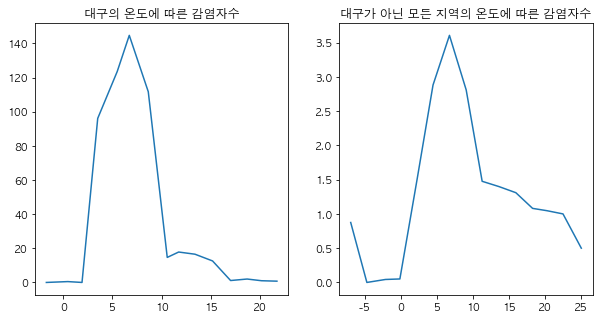

In [141]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(temp_daegu['avg_temp'].values,temp_daegu['time_weather_confiremd_gradient'].values)
plt.title("대구의 온도에 따른 감염자수")

plt.subplot(1,2,2)
plt.plot(temp_not_daegu['avg_temp'].values,temp_not_daegu['time_weather_confiremd_gradient'].values)
plt.title("대구가 아닌 모든 지역의 온도에 따른 감염자수")

In [139]:
humidity_not_daegu = time_weather[time_weather["province"]!='Daegu']['avg_relative_humidity']

humidity_not_daegu = time_weather[time_weather["province"]!='Daegu'].groupby(pd.cut(humidity_not_daegu,15)).mean()

In [140]:
humidity_daegu = time_weather[time_weather["province"]=='Daegu']['avg_relative_humidity']

humidity_daegu = time_weather[time_weather["province"]=='Daegu'].groupby(pd.cut(humidity_daegu,15)).mean()

### 상대 습도에 따른 감염자 수 그래프

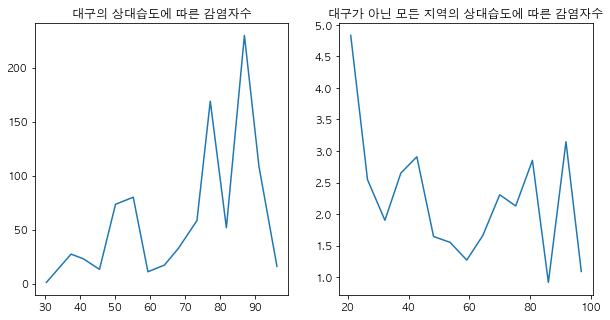

In [143]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(humidity_daegu['avg_relative_humidity'].values,humidity_daegu['time_weather_confiremd_gradient'].values)
plt.title("대구의 상대습도에 따른 감염자수")

plt.subplot(1,2,2)
plt.plot(humidity_not_daegu['avg_relative_humidity'].values,humidity_not_daegu['time_weather_confiremd_gradient'].values)
plt.title("대구가 아닌 모든 지역의 상대습도에 따른 감염자수")

plt.show()

>  ## 섭씨온도 또는 상대습도에 따른 코로나 감염 그래프 분석
- 온도에 따른 감염자수 그래프를 보면 확실히 5도에서 10도사이에서 감염자 수가 많이 나오는 거 같다. 
- 상대습도에 따른 감염자수 그래프를 보면 대구의 겨우 70%에서 90%에서 많이 나오지만 대체로 골고루 나오는 것 같다.
- 따라서 상대습도는 제외하고 온도에 따라 감염자 수를 분석하여 코로나 감염수를 예측하는 것이 좋을 거 같다.